In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load your dataset

df = pd.read_csv("D:/downloads 2/ecommerce_data.csv", parse_dates=["order_datetime"])


#  Handle missing review scores

In [6]:
df['review_score'].fillna(df['review_score'].mean(), inplace=True)

C:\Users\Sandipan Jana\AppData\Local\Temp\ipykernel_6516\516660258.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['review_score'].fillna(df['review_score'].mean(), inplace=True)


# Extract hour of the order

In [7]:
df['hour'] = df['order_datetime'].dt.hour

# Top Selling Products

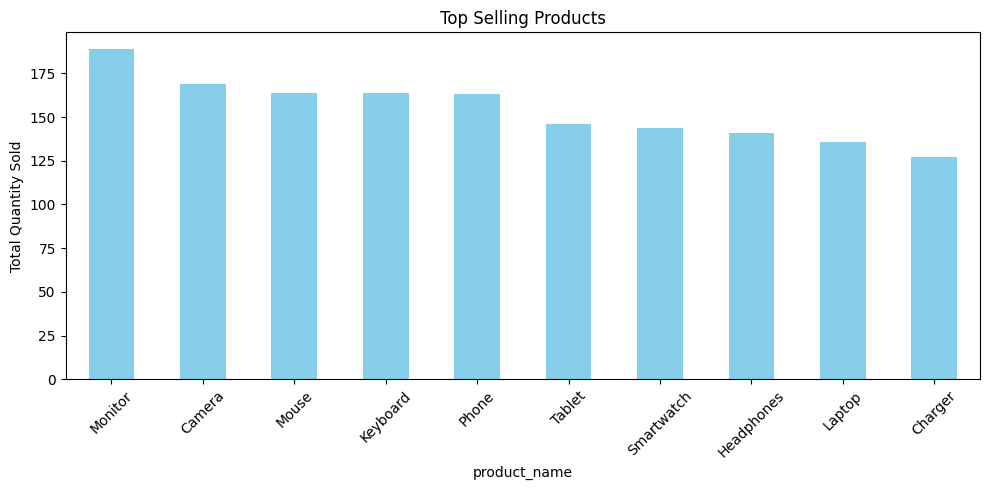

In [8]:

top_products = df.groupby('product_name')['order_quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top Selling Products')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Peak Hours for Orders

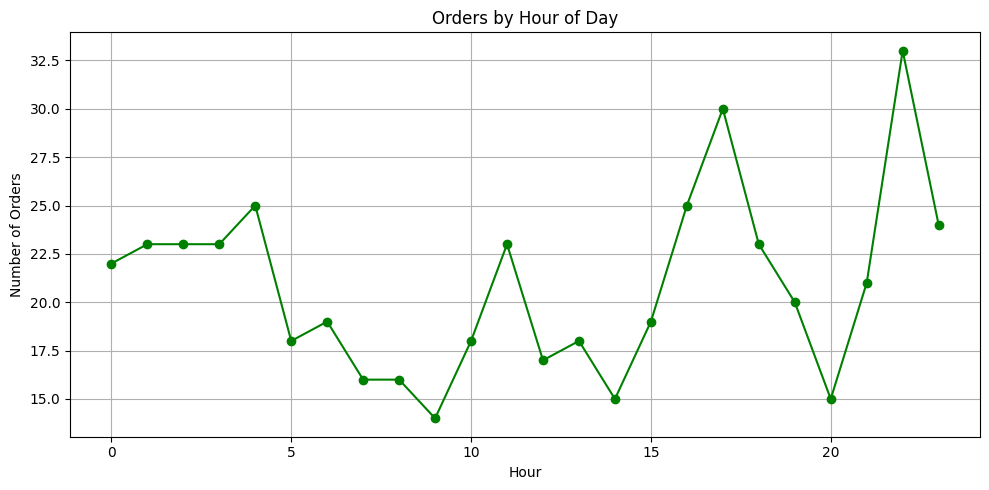

In [9]:
orders_by_hour = df['hour'].value_counts().sort_index()

plt.figure(figsize=(10,5))
orders_by_hour.plot(kind='line', marker='o', color='green')
plt.title('Orders by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.tight_layout()
plt.show()

#  User Retention

In [10]:
user_orders = df.groupby('user_id')['order_id'].nunique()
retained_users = user_orders[user_orders > 1].count()
total_users = user_orders.count()
retention_rate = (retained_users / total_users) * 100

print(f"✅ User Retention Rate: {retention_rate:.2f}%")

✅ User Retention Rate: 0.00%


# Average Review Score per Product

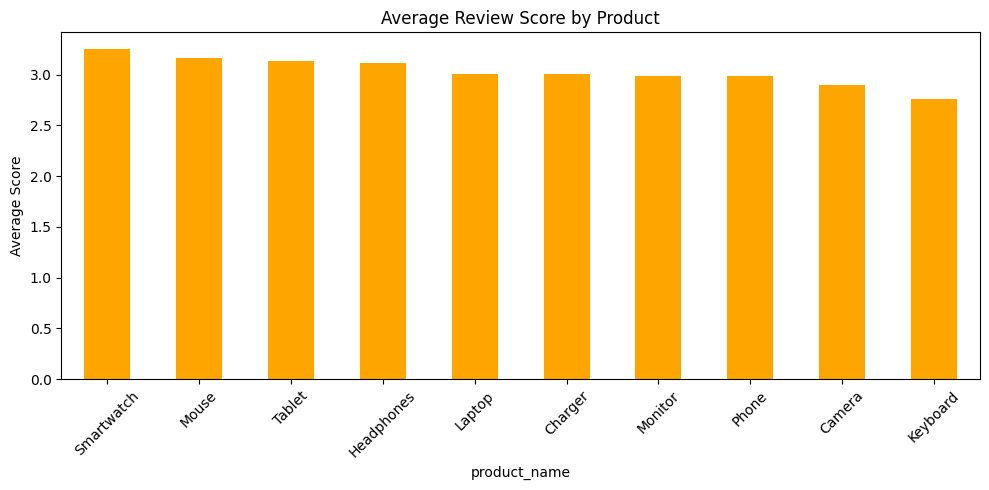

In [11]:
avg_review_scores = df.groupby('product_name')['review_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
avg_review_scores.plot(kind='bar', color='orange')
plt.title('Average Review Score by Product')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()